In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [7]:
start = '2015-01-01'
end = '2025-01-01'

stock = yf.download('AAPL',  start=start, end=end)
print(stock.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320431  24.789800  23.879980  24.778677  212818400
2015-01-05  23.635281  24.169160  23.448424  24.089078  257142000
2015-01-06  23.637514  23.897780  23.274920  23.699800  263188400
2015-01-07  23.968966  24.069067  23.735393  23.846617  160423600
2015-01-08  24.889904  24.947741  24.180289  24.298189  237458000


C:\Users\Soham\AppData\Local\Temp\ipykernel_27364\413023597.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


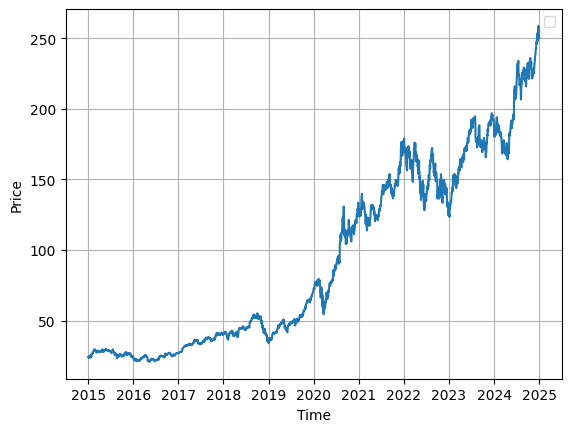

In [8]:
plt.plot(stock.Close)
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [9]:
m100 = stock.rolling(100).mean()
m100

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-12-24,229.357535,230.909825,226.959531,228.668553,48423998.0
2024-12-26,229.859200,231.380120,227.579567,229.263386,47500883.0


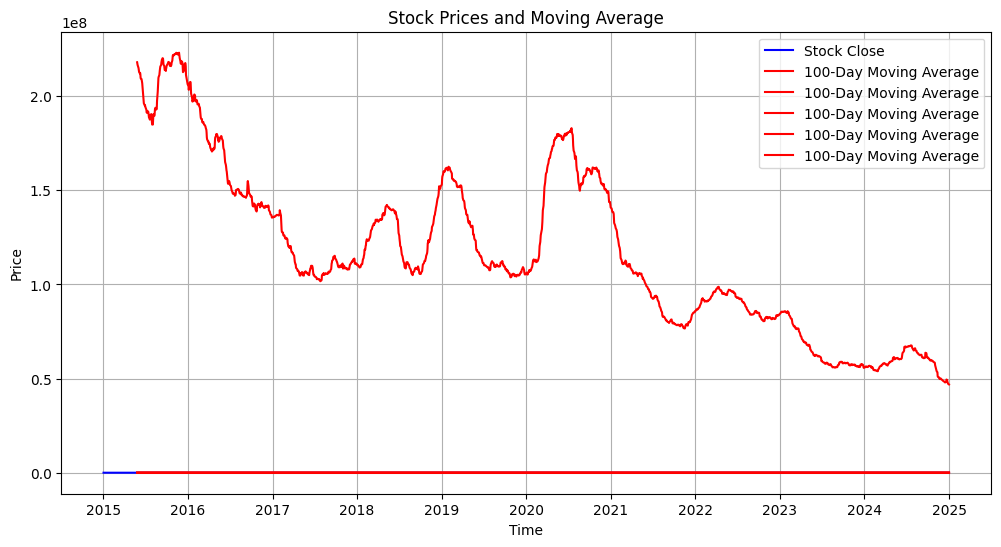

In [10]:

plt.figure(figsize=(12, 6))
plt.plot(stock.Close, 'b', label='Stock Close')
plt.plot(m100, 'r', label='100-Day Moving Average')

plt.title('Stock Prices and Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [11]:
m200 = stock.rolling(200).mean()
m200

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-12-24,211.182571,212.957190,209.096079,210.859780,56879269.0
2024-12-26,211.614169,213.390201,209.531783,211.287631,56716327.5


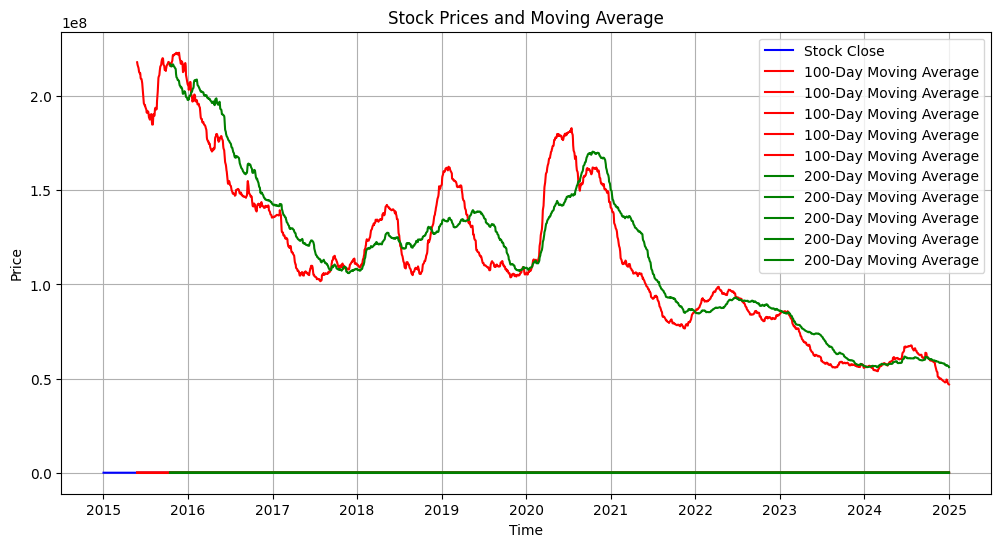

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(stock.Close, 'b', label='Stock Close')
plt.plot(m100, 'r', label='100-Day Moving Average')
plt.plot(m200 , 'g' ,label='200-Day Moving Average')

plt.title('Stock Prices and Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [13]:
data_traning = pd.DataFrame(stock['Close'][0:int(len(stock)*0.70)])
data_testing = pd.DataFrame(stock['Close'][0:int(len(stock)*0.30)])
print(data_testing.shape)
print(data_traning.shape)

(754, 1)
(1761, 1)


In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_traning_array = scaler.fit_transform(data_traning)
data_traning_array

array([[0.02328838],
       [0.01891194],
       [0.01892621],
       ...,
       [1.        ],
       [0.99347121],
       [0.99403613]])

In [17]:
data_traning_array.shape

(1761, 1)

In [18]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:



x_train = []  # Initialize as a list
y_train = []  # Initialize as a list


for i in range(100, data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100:i])  
    y_train.append(data_traning_array[i, 0])     

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape) 
print(y_train.shape)  

(1661, 100, 1)
(1661,)


In [20]:

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model1 = Sequential()
model1.add(LSTM(units = 50, activation='relu',return_sequences= True,
                input_shape = ( x_train.shape[1],1)))
model1.add(Dropout(0.2))
#
model1.add(LSTM(units = 60, activation='relu',return_sequences= True,))
                
model1.add(Dropout(0.3))
#
model1.add(LSTM(units = 80, activation='relu',return_sequences= True,))
model1.add(Dropout(0.3))
#
model1.add(LSTM(units = 120, activation='relu'))
model1.add(Dropout(0.4))

model1.add(Dense(units=1))

d:\machine learning\ml projects\stock price predication\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model1.compile(optimizer='adam', loss='mean_squared_error')
model1.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0520
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0037
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0039
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0030
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0032
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0027
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0034
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0037
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0032
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0035
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0030
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0035
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0025
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0031
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0027
Epoc

In [24]:
model1.save('keras_model.h5')

In [25]:
data_testing.head()

Ticker,AAPL
Date,
2015-01-02,24.320431
2015-01-05,23.635281
2015-01-06,23.637514
2015-01-07,23.968966
2015-01-08,24.889904


In [26]:
data_traning.tail(100)

Ticker,AAPL
Date,
2021-08-09,143.368378
2021-08-10,142.887512
2021-08-11,143.142685
2021-08-12,146.116241
2021-08-13,146.322296
...,...
2021-12-22,172.619476
2021-12-23,173.248428
2021-12-27,177.228806


In [32]:
past_100_days = data_traning.tail(100)

In [ ]:

final_stock = pd.concat([past_100_days, data_testing], ignore_index=True)


In [39]:
final_stock.head()

Ticker,AAPL
0,143.368378
1,142.887512
2,143.142685
3,146.116241
4,146.322296


In [40]:
input_data= scaler.fit_transform(final_stock)
input_data

array([[7.83714440e-01],
       [7.80642883e-01],
       [7.82272814e-01],
       [8.01266589e-01],
       [8.02582776e-01],
       [8.15245422e-01],
       [8.09415759e-01],
       [7.85407043e-01],
       [7.87538537e-01],
       [7.96878747e-01],
       [8.06406969e-01],
       [8.05842736e-01],
       [7.97944250e-01],
       [7.92804064e-01],
       [7.99448742e-01],
       [8.27782532e-01],
       [8.19696130e-01],
       [8.23958923e-01],
       [8.31105065e-01],
       [8.35179456e-01],
       [8.50161511e-01],
       [8.40256970e-01],
       [8.33737732e-01],
       [8.01768054e-01],
       [8.05403942e-01],
       [7.96439660e-01],
       [8.02144177e-01],
       [8.00639685e-01],
       [7.83526720e-01],
       [7.63968615e-01],
       [7.67040075e-01],
       [7.82210241e-01],
       [7.88353454e-01],
       [7.88917492e-01],
       [7.79201256e-01],
       [7.57512144e-01],
       [7.63279137e-01],
       [7.54941857e-01],
       [7.62150768e-01],
       [7.40148106e-01],


In [41]:
input_data.shape

(854, 1)

In [44]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i , 0])
    

In [45]:
x_test,y_test  = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(754, 100, 1)
(754,)


In [46]:
y_pred = model1.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [47]:
y_pred.shape

(754, 1)

In [48]:
scaler.scale_

array([0.00638756])

In [49]:
scale_factor = 1/0.00638756
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

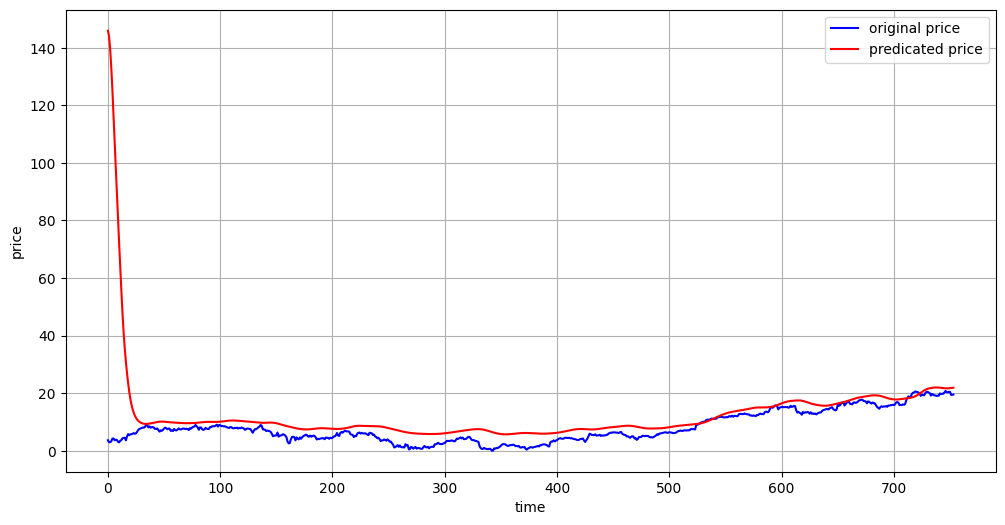

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label ='original price')
plt.plot(y_pred , 'r' , label= 'predicated price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.grid()
plt.show()
